In [18]:
%reload_ext jupyter-rdfify

**A small reminder that these assignments will be graded automatically. Please read the tasks carefully and be as pedantic as possible. Run your answers to check if your code parses correctly. Typing errors will lead to point loss. Do not change code that is already given as this may break the unit tests and lead to 0 points. Do not use comments in your code.**

# Turtle
*Turtle* stands for **Terse RDF Triple Language** and is a [W3C recommended](https://www.w3.org/TR/turtle/) syntax and file format for serializing RDF Graphs. To serialize an RDF triple of the form *(Subject, Predicate, Object)* in Turtle, you just write them in that sequence, followed by a period. In this example you would write:

**Subject Predicate Object .**

Please note the period after a triple.

In turtle, URIs are encased in angled brackets (&lt; &gt;). The RDF triple *(http://example.org/#Germany, http://example.org/#capital, http://example.org/#Berlin)* is serialized like this:

**&lt;http://example.org/#Germany&gt; &lt;http://example.org/#capital&gt; &lt;http://example.org/#Berlin&gt; .**

**Because of its very simple syntax, Turtle is intuitive and human-readable.**

### Syntactic sugar:
Because subjects or subject-predicate-combinations often repeat in the same graph, Turtle introduces some syntactic sugar.
To repeat a subject, one can use a semicolon instead of a period after a triple. To express that germany has the capital Berlin and the state Bavaria, one would write the following:

**&lt;http://example.org/#Germany&gt; &lt;http://example.org/#capital&gt; &lt;http://example.org/#Berlin&gt; ;  
&nbsp;&nbsp;&nbsp;&nbsp;&lt;http://example.org/#state&gt; &lt;http://example.org/#Bavaria&gt; .**

To repeat a subject-predicate-combination, one can use a comma instead of a period after the triple. To express that germany has the state Berlin and the state Bavaria, one would write the following:

**&lt;http://example.org/#Germany&gt; &lt;http://example.org/#state&gt; &lt;http://example.org/#Berlin&gt; ,  
&nbsp;&nbsp;&nbsp;&nbsp;&lt;http://example.org/#Bavaria&gt; .**

Both of these can be chained to repeat the same subject/subject-predicate-combination over and over.

**You are allowed and even encouraged to use syntactic sugar throughout all our assignments.**
    

## Task 1: My first Graph [6 points]
### 1a) Sightseeing [3 points]
The task is to create an RDF graph about places of interest using Turtle. The graph must contain the following Sights and their locations: The Louvre, the Colosseum and the Eiffel Tower.

The graph should contain the following information: Both the **Louvre** and the **Eiffel Tower** are **located in** **France**. The **Colosseum** is **located in** **Italy**. **All** three **are sights**.

Use the following URIs:  
The Louvre: http://example.org/sights#Louvre  
The Colosseum: http://example.org/sights#Colosseum  
The Eiffel Tower: http://example.org/sights#EiffelTower  
Located in: http://example.org/properties#locatedIn  
France: http://example.org/countries#France  
Italy: http://example.org/countries#Italy  
Sight: http://example.org/classes#Sight  
Is of type: http://www.w3.org/1999/02/22-rdf-syntax-ns#type

**Do not use or define CURIEs (Prefixes) in this part of the task. The graph must not contain additional triples.**

In [19]:
!pip install rdflib 

Defaulting to user installation because normal site-packages is not writeable


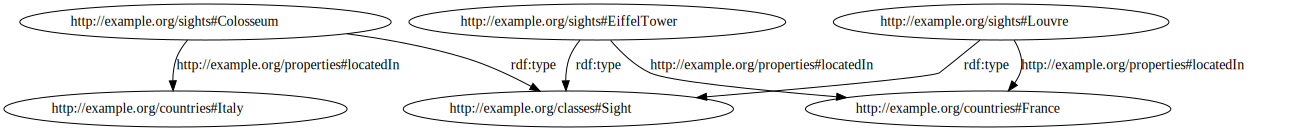

In [34]:

%%rdf turtle -l sights
"""
This code snippet represents RDF triples describing various sights located in different countries.

The RDF triples are defined using the Turtle syntax and include the following information:

- The Louvre sight is of type "Sight" and is located in France.
- The Eiffel Tower sight is of type "Sight" and is located in France.
- The Colosseum sight is of type "Sight" and is located in Italy.

The RDF triples are used to represent semantic information about the sights and their locations.

Note: This code snippet is part of a larger file located at "/home/kali/Documents/Notebooks/Notebooks/SemWebEx1.ipynb".
"""
### YOUR SOLUTION HERE
<http://example.org/sights#Louvre> 
    <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/classes#Sight> ;
    <http://example.org/properties#locatedIn> <http://example.org/countries#France> .

<http://example.org/sights#EiffelTower> 
    <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/classes#Sight> ;
    <http://example.org/properties#locatedIn> <http://example.org/countries#France> .

<http://example.org/sights#Colosseum> 
    <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/classes#Sight> ;
    <http://example.org/properties#locatedIn> <http://example.org/countries#Italy> .


The following cell is a test cell to check your answer. Please remember that this is only a fraction of the tests to give you an orientation and that the real evaluation is a lot more thorough.

In [35]:
# This test will check whether your graph is complete and correct. [2 points]
from rdflib import URIRef
m = "The graph is missing the following information: {}"
store = %rdf -r
g = store['rdfgraphs']["sights"]
ex = "http://example.org/{}"
tower = URIRef(ex.format("sights#EiffelTower"))
louvre = URIRef(ex.format("sights#Louvre"))
locIn = URIRef(ex.format("properties#locatedIn"))
ofType = URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#type")
sight = URIRef(ex.format("classes#Sight"))
france = URIRef(ex.format("countries#France"))
assert((tower, locIn, france) in g), m.format("The Eiffel Tower is located in France.")
assert((louvre, ofType, sight) in g), m.format("The Louvre is a sight.")

In [36]:
# This test will check whether your graph is minimal (does not contain additional triples). [1 point]
"""
This test checks whether the graph is minimal, meaning it does not contain any additional triples.
The test asserts that the length of the graph is equal to 6, indicating that there are no extra triples.
If the assertion fails, an error message is raised.
"""
# This point will not be granted when you use CURIEs or define prefixes (which is forbidden in this part of the task)
# Some tests - like this one - are instructor only and can't be seen/run by students.
assert(len(g) == 6), "Your graph contains additional triples."

print("All tests passed.")

All tests passed.


### CURIEs
Because we only used full URIs in 1a), the graph looks cluttered and both the graph and the turtle source are hard to read. But many URIs have the same prefix (http://example.org/sights for example) and turtle allows us to define abbreviations for these prefixes. These abbreviated URIs are called *Compact URIs* or *CURIES*. In Turtle, such a prefix is defined using the **@prefix** keyword, followed by the abbreviation, then the URI prefix in angled brackets (&lt; &gt;) and finally a period. For example, if we want to abbreviate *http://example.org/#* with *ex:*, then we need to prepend the following line to the turtle document:

**@prefix ex: &lt;http://example.org/#&gt; .**

Now we can abbreviate the RDF triple:

**&lt;http://example.org/#Germany&gt; &lt;http://example.org/#capital&gt; &lt;http://example.org/#Berlin&gt; .**

to:

**ex:Germany ex:capital ex:Berlin .**

Note, that we omit the angled brackets when using CURIEs.

### 1b) Using CURIEs [3 points]
Create the same RDF graph as in 1a) but use CURIEs and introduce the following abbreviations:  
Abbreviate http://example.org/sights# to **si:**  
Abbreviate http://example.org/countries# to **co:**  
Abbreviate http://example.org/properties# to **pr:**  
Abbreviate http://example.org/classes# to **cl:**  

http://www.w3.org/1999/02/22-rdf-syntax-ns# can be abbreviated to **rdf:** (optional)

Because the predicate rdf:type (http://www.w3.org/1999/02/22-rdf-syntax-ns#type) is used very frequently, you can just write **a** instead of the URI. Try it!  

**Use the defined prefixes whenever they are applicable.**  
**You are allowed and even encouraged to define and use as many prefixes as you want in all following tasks and assignments.**

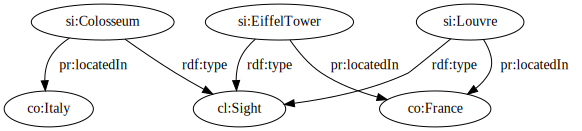

In [40]:
%%rdf turtle -l sights2

### YOUR SOLUTION HERE
@prefix si: <http://example.org/sights#> .
@prefix co: <http://example.org/countries#> .
@prefix pr: <http://example.org/properties#> .
@prefix cl: <http://example.org/classes#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

si:Louvre a cl:Sight ;
    pr:locatedIn co:France .

si:EiffelTower a cl:Sight ;
    pr:locatedIn co:France .

si:Colosseum a cl:Sight ;
    pr:locatedIn co:Italy .


In [41]:
# This test will check whether you defined all mandatory prefixes [1 point]
from rdflib import URIRef
store = %rdf -r
g = store['rdfgraphs']["sights2"]
ns = list(g.namespaces())
assert(('si', URIRef("http://example.org/sights#")) in ns)
assert(('co', URIRef("http://example.org/countries#")) in ns)
assert(('pr', URIRef("http://example.org/properties#")) in ns)
assert(('cl', URIRef("http://example.org/classes#")) in ns)

In [42]:
# This test will check whether you actually used CURIEs whenever applicable. [1 point]
# Check if CURIEs are used whenever applicable
si_uri = "http://example.org/sights#"
co_uri = "http://example.org/countries#"
pr_uri = "http://example.org/properties#"
cl_uri = "http://example.org/classes#"

for s, p, o in g:
    # Check if the subject, predicate, or object is using the full URI where a CURIE should be used
    if isinstance(s, URIRef) and (str(s).startswith(si_uri) or str(s).startswith(co_uri) or str(s).startswith(pr_uri) or str(s).startswith(cl_uri)):
        raise ValueError(f"Subject {s} is using a full URI instead of a CURIE.")
    
    if isinstance(p, URIRef) and (str(p).startswith(si_uri) or str(p).startswith(co_uri) or str(p).startswith(pr_uri) or str(p).startswith(cl_uri)):
        raise ValueError(f"Predicate {p} is using a full URI instead of a CURIE.")
    
    if isinstance(o, URIRef) and (str(o).startswith(si_uri) or str(o).startswith(co_uri) or str(o).startswith(pr_uri) or str(o).startswith(cl_uri)):
        raise ValueError(f"Object {o} is using a full URI instead of a CURIE.")

print("All CURIEs are used properly!")


ValueError: Subject http://example.org/sights#EiffelTower is using a full URI instead of a CURIE.

In [26]:
# This test will check whether the graph is complete and correct. [1 point]


## Task 2: Literals [3 points]
For basic values such as numbers and strings, it is impractical to use URIs. Instead of URIs we use literals. Literals have a datatype, which is string by default. Literals can only be used in the object position of triples and are encased in double quotes (" "). An example for a triple with a string literal is:

**ex:Germany ex:name "Deutschland" .**

To specify a *datatype*, it is appended to the literal with *two carets* (^^). A datatype can be an arbitrary URI, but there are some predefined datatypes which should suffice in most cases. These predefined datatypes use the prefix *http://www.w3.org/2001/XMLSchema#*, which is usually abbreviated with *xsd:*. An example for an integer literal:

**ex:Germany ex:population "83042235"^^xsd:int .**

There are also string literals with a specified language. This is useful for names that differ in different languages. To specify a language, we append a two character language tag with an at symbol (@) behind the literal. The literal is then automatically interpreted as a language tagged string (this datatype is never specified explicitly). To express that ex:germany has a different name in english and in german, one would add two triples:

**ex:Germany ex:name "Deutschland"@de .**  
**ex:Germany ex:name "Germany"@en .**  

Please note that the URI ex:Germany is **not** the same as the literal "Germany" and in some cases you can't deduce the name of an entity from the URI (for example www.wikidata.org uses numerical IDs, e.g https://www.wikidata.org/entity/Q1017).

### 2a) Austria [3 points]
The task is to create an RDF graph about Austria with Turtle. The graph must contain the following information:

Austria is called **Österreich** in german (*de*), **Austria** in english (*en*) and **Oostenrijk** in dutch (*nl*). Austria has a population of **8901064** and an area of **83878.99**km². The capital of Austria is Vienna, which is called **Vienna** in english and **Wenen** in dutch.

Use the following URIs:  
Austria: http://example.org/countries#Austria  
Vienna: http://example.org/cities#Vienna  
Capital: http://example.org/properties#capital  
Area: http://example.org/properties#area  
Population: http://example.org/properties#population  
Is called: rdfs:label

Language tags:

| Language | Tag |
| --- | --- |
| English | en |
| German | de |
| Dutch | nl |

Only use the datatypes **xsd:string**, **rdf:langString**, **xsd:int** and **xsd:float**.

Tip: CURIEs do not change the graph but they make the result more readable and less error prone. Use them whenever possible!

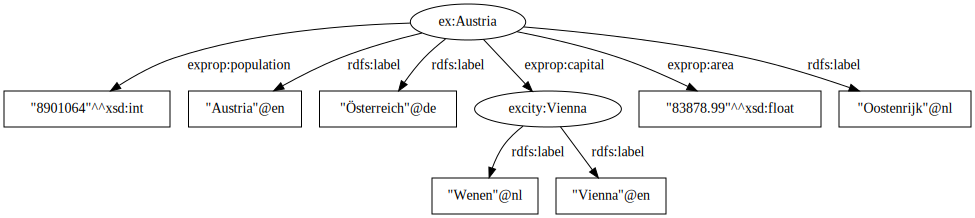

In [27]:
%%rdf turtle -l literals
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
### YOUR SOLUTION HERE
@prefix ex: <http://example.org/countries#> .
@prefix exprop: <http://example.org/properties#> .
@prefix excity: <http://example.org/cities#> .

# Austria details
ex:Austria
    rdfs:label "Österreich"@de ;
    rdfs:label "Austria"@en ;
    rdfs:label "Oostenrijk"@nl ;
    exprop:population "8901064"^^xsd:int ;
    exprop:area "83878.99"^^xsd:float ;
    exprop:capital excity:Vienna .

# Vienna details
excity:Vienna
    rdfs:label "Vienna"@en ;
    rdfs:label "Wenen"@nl .


In [28]:
# This test will check whether your graph contains the facts (even if their datatype,value or quantity is wrong). [1 point]
from rdflib import URIRef
store = %rdf -r
g = store['rdfgraphs']["literals"]
ex = "http://example.org/{}"
au = URIRef(ex.format("countries#Austria"))
pop = URIRef(ex.format("properties#population"))
vi = URIRef(ex.format("cities#Vienna"))
lab = URIRef("http://www.w3.org/2000/01/rdf-schema#label")
err = "The graph does not contain information about {}."
assert (au, pop, None) in g, err.format("Austria's population")
assert (vi, lab, None) in g, err.format("Vienna's name")
assert (au, lab, None) in g, err.format("Austria's name")

In [29]:
from rdflib import Literal, Namespace

xsd = Namespace("http://www.w3.org/2001/XMLSchema#")

# This test will check whether your graph contains the correct datatypes. [1 point]
err = "The datatype of {} is not correct."
assert (Literal("8901064", datatype=xsd.int) in g.objects(au, pop)), err.format("Austria's population")
assert (Literal("83878.99", datatype=xsd.float) in g.objects(au, URIRef(ex.format("properties#area")))), err.format("Austria's area")

print("All tests passed.")

All tests passed.


In [30]:
# This test will check whether your graph contains all language tagged literals. [1 point]
err = "The graph is missing the following language tagged literal: {}"
assert (Literal("Österreich", lang="de") in g.objects(au, lab)), err.format("Austria's name in German")
assert (Literal("Austria", lang="en") in g.objects(au, lab)), err.format("Austria's name in English")
assert (Literal("Oostenrijk", lang="nl") in g.objects(au, lab)), err.format("Austria's name in Dutch")
assert (Literal("Vienna", lang="en") in g.objects(vi, lab)), err.format("Vienna's name in English")
assert (Literal("Wenen", lang="nl") in g.objects(vi, lab)), err.format("Vienna's name in Dutch")

print("All tests passed.")

All tests passed.


## Task 3: Blank Nodes [3 points]
Sometimes resources do not or should not have an identifier but still stand in relation to other resources. These anonymous resources are represented by blank nodes in RDF graphs. In Turtle, blank nodes are are represented with an underscore followed by a colon and an identifier (\_:identifier). The purpose of the identifier is to be able to locally reference the anonymous resource multiple times. Even if two blank nodes in different graphs use the same identifier, they usually reference a different resource. For example, when you want to express that you know someone who is a professor but doesn't have an identifier and there is someone else you don't know who is also a professor, you do it like this:

**ex:me ex:knows \_:1 .  
\_:1 rdf:type ex:professor .  
\_:2 rdf:type ex:professor .**

You know \_:1 but don't know \_:2 but they are both professors.

Additionally, blank nodes are often used to represent n-ary relations. For example, a grading that needs to have a grade and a grader can be expressed like this:

**ex:student ex:grading \_:1 .  
\_:1 ex:grade "1.0" .  
\_:1 ex:grader ex:professor .**

**Syntactic sugar:**  
To make this more readable, you can instead use square brackets (\[ \]) and every predicate-object-combination in between the square brackets will reference the same blank node. The grade example would then look like this:

**ex:student ex:grading \[  
&nbsp;&nbsp;&nbsp;&nbsp;ex:grade "1.0" ;  
&nbsp;&nbsp;&nbsp;&nbsp;ex:grader ex:professor  
\] .**

Note that we must use semicolons and commas in between the brackets (see syntactic sugar at top of assignment) and there is still a period after the brackets.

Also Note that the blank node identifier is exchangable as long as we use the same one when referencing the same node. That is why the bracket notation does not need an identifier.

### 3a) I know someone who lives somewhere [3 points]
Create an RDF graph using turtle that expresses the following:  
You, a person without an identifier, knows another person without an identifier, who lives at the following address:

Street: Templergraben  
House number: 55  
Postal code: 52062  
City: Aachen

Use the following URIs:  
Type: rdf:type  
Knows: foaf:knows  
Person: http://example.org/classes#Person  
Address: http://example.org/properties#address  
Street: http://example.org/properties#street  
House number: http://example.org/properties#houseNumber  
Postal code: http://example.org/properties#postalCode  
City: http://example.org/properties#city  

Hint: use an n-ary relation for the address.

**Use only string literals without language tags.**

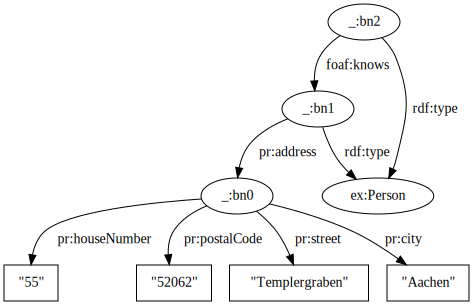

In [31]:
%%rdf turtle -l bnodes
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix pr: <http://example.org/properties#> .
@prefix ex: <http://example.org/classes#> .
### YOUR SOLUTION HERE
# You, an anonymous person
[] rdf:type ex:Person ;
    foaf:knows [
        rdf:type ex:Person ;
        pr:address [
            pr:street "Templergraben" ;
            pr:houseNumber "55" ;
            pr:postalCode "52062" ;
            pr:city "Aachen"
        ]
    ] .



In [45]:
# This test will check whether there is an anonymous person that knows another anonymous person. [1 point]

from rdflib import Graph, URIRef, BNode, Namespace
from rdflib.namespace import RDF

# Assuming you already have your RDF graph loaded
store = %rdf -r
g = store['rdfgraphs']["bnodes"]

# Namespaces
EX = Namespace("http://example.org/classes#")
FOAF = Namespace("http://xmlns.com/foaf/0.1/")
PR = Namespace("http://example.org/properties#")

# Test function
def test_anonymous_person_knows_another_anonymous_person(g):
    # Iterate through all triples in the graph
    found = False
    for s, p, o in g.triples((None, FOAF.knows, None)):
        # Check if the subject is a blank node
        if isinstance(s, BNode) and isinstance(o, BNode):
            # Check if the object is also a blank node
            if (s, RDF.type, EX.Person) in g and (o, RDF.type, EX.Person) in g:
                found = True
                break
    assert found, "No anonymous person that knows another anonymous person found."

# Run the test
test_anonymous_person_knows_another_anonymous_person(g)

print("Test passed: An anonymous person knows another anonymous person.")


Test passed: An anonymous person knows another anonymous person.


In [46]:
# This test will check whether there is an anonymous entity with an n-ary address. [1 point]
def test_anonymous_entity_with_nary_address(g):
    # Iterate through all triples in the graph to find blank nodes
    found = False
    for s in g.subjects(RDF.type, EX.Person):
        if isinstance(s, BNode):  # Check if the subject is a blank node
            # Check if this blank node (person) has an address that is also a blank node
            for o in g.objects(s, PR.address):
                if isinstance(o, BNode):
                    # Check for the required properties in the n-ary address
                    if (o, PR.street, Literal("Templergraben")) in g and \
                       (o, PR.houseNumber, Literal("55")) in g and \
                       (o, PR.postalCode, Literal("52062")) in g and \
                       (o, PR.city, Literal("Aachen")) in g:
                        found = True
                        break
        if found:
            break
    
    assert found, "No anonymous entity with an n-ary address found."

# Run the test
test_anonymous_entity_with_nary_address(g)

print("Test passed: An anonymous entity with an n-ary address was found.")

Test passed: An anonymous entity with an n-ary address was found.


In [47]:
# This test will check whether there is a correct n-ary address. [1 point]

def test_correct_nary_address(g):
    # Iterate through all blank nodes that could represent an address
    found = False
    for s in g.subjects(None, None):
        if isinstance(s, BNode):
            # Check for the required properties in the n-ary address
            if (s, PR.street, Literal("Templergraben")) in g and \
               (s, PR.houseNumber, Literal("55")) in g and \
               (s, PR.postalCode, Literal("52062")) in g and \
               (s, PR.city, Literal("Aachen")) in g:
                found = True
                break
    
    assert found, "No correct n-ary address found in the graph."

# Run the test
test_correct_nary_address(g)

print("Test passed: A correct n-ary address was found.")


Test passed: A correct n-ary address was found.
